# Sentiment Classification for Twitter feed data
*Saksham Dembla (dembla.saksham@gmail.com)*


# Contents:

1. Overview
2. Collecting Data
3. Exploratory Data Analysis
   - Language Distribution
   - Time Series Analysis
   - User Mentions
6. Cleaning up tweets text
7. Pre process data for classification
8. Feature Extraction
   - Bag of Words
9. Build and Train Classifiers
   - Naive Bayes
   - Max Entropy (Logistic regression)
10. SVM Classifier
11. Vectorization using TFIDF vectorizer
12. Model Comparison
13. Classify Collected Tweets
14. Future Work
15. Refrences

## Overview

Twitter has already made waves being a unique microblogging platform where freedom of speech means 140 characters. Millions of people share their thoughts, opinions, concerns, resentments, suggestions, complains, compliments and much more on various topics such as latest events, news, politics, sports, technology, music, movies, art, celebrities, regular people etc. It is a social media platform where people say anything about everything and call them 'tweets'! Luckily for us, Twitter provides us with an open source API, which means that we can use our data science wizardry to understand what people think about a particular topic. We can of course do the same by tediously going through thousands of tweets or we could write some python code and have our smart pc do the same for us.

In this document, I have listed out and explained every step from collecting data to creating effective models to classify them as positive, negative or neutral. The figure below provdes an overview of steps we will follow on a higher level.

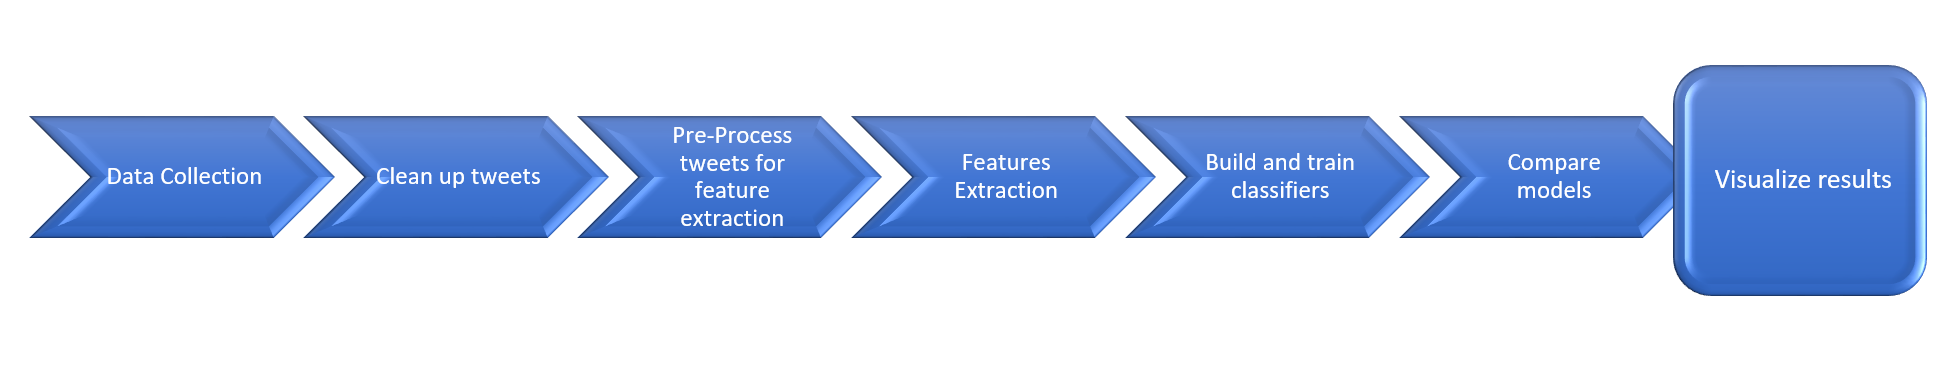

In [14]:
from IPython.display import Image
Image(filename = 'C:/Users/Dembla/Desktop/Jobs/twitter project/Fig1.PNG')

Apart from building classifiers to classify tweets into postive and negative sentiments, I performed some entity analysis along the way. I will get into details when we get there. Let's get Started!

## Collecting Data

The very first question we need to ask ourself is why are we doing this? Well, as we have already established: to summarize twitterati's collective opinion on a certain topic. I decided to go with a much talked about Hollywood flick, Wonder Woman. Let's see what people feel about this movie. First we need to collect tweets about Wonder Woman by creating an app using twitter API known as tweepy. You can do the same by following simple steps here. Once we are done, we can use our credentials to connect via tweepy stream API and collect tweets in real time. We use a keyword to stream and download tweets based on the particular topic. Below is the code to establishes a connetion with twitter server via tweepy stream API and download tweets related to the topic 'WonderWoman'


In [ ]:
#importing necessary modules
import tweepy
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from tweepy import Stream
from tweepy.streaming import StreamListener
import json
import time
import json
from tweepy.streaming import StreamListener

#Crdentials to connect to access twitter server
consumer_key = 'XXXXXXXXXXXXXXX'
consumer_secret = 'YYYYYYYYYYYYYYY'
access_token =  'ZZZZZZZZZZZZZZZZ'
access_token_secret =  'XYZXYZXZYZXYZ'  

#This is a stream listener that saves outut to .json file.

class StdOutListener(StreamListener): 
    def on_data(self, data): 
            with open ('WonderWoman.json' , 'a') as f:
                f.write(data)
                return True
            return True
            print(data)
    def on_error(self, status): 
        print(status)

#This handles Twitter authetification and the connection to Twitter Streaming

if __name__ == '__main__': 
    l = StdOutListener() 
    auth = OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_token, access_token_secret) 
    stream = Stream(auth, l) #This line filter Twitter Streams to capture data by the keyword: 'WonderWoman' 
    stream.filter(track=['WonderWoman', '#WonderWoman'])

The code snipet above opens an active conection and streams tweets filtered keywords given. Each tweet recieved is a json(javascript object notation) encoded with all the fields as json objects. We save these json encoded tweets in a json file. We can also choose to save the output in other file formats like text or CSV. We can keep the connection open for as long as we want depending on how many tweets you wish to stream and save.

 Please note that I have masked the credentials to gain access to twitter server. Anyone who wishes to connect with Twitter server usng tweepy API, needs to register as developer on the twitter API website. You can follow the instructiona in this [tweepy API official document](http://tweepy.readthedocs.io/en/v3.5.0/)


Once we have all our data in a json file, we can parse the content and save it in a list:

In [1]:
import json
data = []
with open('C:/Users/Dembla/Desktop/Jobs/twitter project/WonderWoman.json', 'r') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except:
            pass
            #Each line is a data point i.e. a row with all the attributes

print (len(data))#Number of tweets in the file

5209


The length of the list gives us the number of tweets we have in our file. We have 5209 tweets in our file.

## Exploratory Data Analysis

Now that we have our data i.e. 5209 tweets with all the attributes, how about we do some exploratory data analysis(EDA). Let's convert our data into a data frame and look at all the attributes. You can visit [this link](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) for a list of and their attributes and description i.e. data dictionary for a tweet json object

In [2]:
#We import pandas to have to make a data frame from our data
import pandas as pd
#parse_data = "[" + ','.join(data).replace('\n', '') + "]"
tweets = pd.DataFrame(data)
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,None,None,Thu Jun 08 04:35:46 +0000 2017,NaN,"{'hashtags': [{'text': 'WonderWoman', 'indices...","{'media': [{'id': 872664524767100931, 'id_str'...",NaN,0,False,low,...,NaN,NaN,0,False,{'created_at': 'Thu Jun 08 04:00:47 +0000 2017...,"<a href=""http://twitter.com/download/android"" ...",RT @VanityFair: Catch up on 76 years of #Wonde...,1496896546415,False,"{'id': 340145307, 'id_str': '340145307', 'name..."
1,None,None,Thu Jun 08 04:35:48 +0000 2017,"[0, 45]","{'hashtags': [{'text': 'WonderWoman', 'indices...","{'media': [{'id': 872673476573671424, 'id_str'...",NaN,0,False,low,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Gotham City Garage #WonderWoman #Collectible. ...,1496896548682,False,"{'id': 2557498028, 'id_str': '2557498028', 'na..."
2,None,None,Thu Jun 08 04:35:52 +0000 2017,NaN,"{'hashtags': [], 'urls': [{'url': '', 'expande...",NaN,NaN,0,False,low,...,NaN,NaN,0,False,{'created_at': 'Thu Jun 08 02:13:00 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @lsirikul: This is the crap that @ValerieCo...,1496896552007,False,"{'id': 843670019418611712, 'id_str': '84367001..."
3,None,None,Thu Jun 08 04:35:55 +0000 2017,NaN,"{'hashtags': [], 'urls': [{'url': '', 'expande...",NaN,NaN,0,False,low,...,NaN,NaN,0,False,{'created_at': 'Wed Jun 07 04:03:35 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...","RT @GalGadot: To my fans. Thank you all, I lov...",1496896555934,False,"{'id': 418463966, 'id_str': '418463966', 'name..."
4,None,None,Thu Jun 08 04:35:55 +0000 2017,"[0, 91]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,8.726713e+17,872671292281040896,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",The offer still stands to have you come on my ...,1496896555884,False,"{'id': 34963998, 'id_str': '34963998', 'name':..."


We created a data frame and printed the first 5 rows of our data. Here we can see that our data has 33 attributes. Let's list all the attributes and their data types.

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 33 columns):
contributors                 0 non-null object
coordinates                  13 non-null object
created_at                   5209 non-null object
display_text_range           693 non-null object
entities                     5209 non-null object
extended_entities            1524 non-null object
extended_tweet               158 non-null object
favorite_count               5209 non-null int64
favorited                    5209 non-null bool
filter_level                 5209 non-null object
geo                          13 non-null object
id                           5209 non-null int64
id_str                       5209 non-null object
in_reply_to_screen_name      196 non-null object
in_reply_to_status_id        145 non-null float64
in_reply_to_status_id_str    145 non-null object
in_reply_to_user_id          196 non-null float64
in_reply_to_user_id_str      196 non-null object
is_quote_

We have a list of all the columns and their data types. Note that most of the columns have 'object' as data type. These are nothing but json objects. Some of the fields like 'extended_entities' have a cascaded structure. Now we can begin our EDA.


### Language Distribution

Since people from around the World use twitter to tweet in different languages, we can find how tweets are distributed amongst which languages. We have an attribute 'lang' which is populated with the machine detected language of the tweet text. Let's take a look at the language distribution in our tweets

In [4]:
tweets.groupby('lang').size().sort_values(ascending = False).head()#top 5 languages

lang
en     3540
fr      371
es      318
th      301
und     260
dtype: int64

We can see that the language field is 'BCP 47' coded and as 'en' (english) is the most common language in our data. Now let's visualize languages distribution on a pie chart using matplotlib and Ipython.display modules.

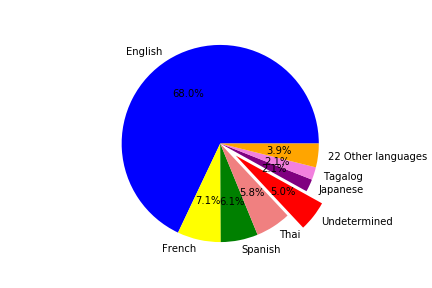

In [5]:
from IPython.display import Image
import matplotlib.pyplot as plt
labels = 'English', 'French', 'Spanish', 'Thai', 'Undetermined', 'Japanese', 'Tagalog', '22 Other languages'
sizes = [3540, 371, 318, 301, 260, 108, 108, 203]
colors = ['blue', 'yellow', 'green', 'lightcoral','red', 'purple', '#f280de', 'orange']
explode = (0,0,0,0,0.2,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.plot()
plt.savefig('C:/Users/Dembla/Desktop/Jobs/language.png')
Image(filename = 'C:/Users/Dembla/Desktop/Jobs/language.png')

### Trend Analysis with time series

Take an example of a live event: A soccer match between Chelsea and Real Madrid. Millions of people are watching, some support Chelsea and others Real Madrid. #ChelseaVsRealMadrid is the top trending hashtag and fans around the World are posting hundreds of tweets every second with #ChelseaVsRealMadrid. Ronaldo scores a goal at 23rd minute, the loud cheering in the stadium makes it evident that Real Madrid fans are extatic. Is it a vaid hypothesis that the rate of flow of tweets with #ChelseaVsRealMadrid must have spiked immediately after the goal i.e. more tweets from happy Real and angry Chelsea fans? We can confirm this hypothesis by looking at the time series analysis of tweets streamed and collected throughout the match.

If I were to stream tweets in real time with #ChelseaVsRealMadrid as filter and save them to my local directory and now I wish to compute the tweet frequency at every minute of the match to see the moments in the match when most fans around the World posted tweets. Was it every time a goal was scored, or a red card was given? Perhaps the tweet frequency was stable throughout the match and our hypothesis that more fans tweet when something important happens doesn't hold.

We can draw these insights by creating a simple time series chart. Unfortunately, I didn't stream tweets for this or any other live event. However, as an example, the snippet below creates a time series chart of the 'WonderWoman' tweets we collected earlier.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


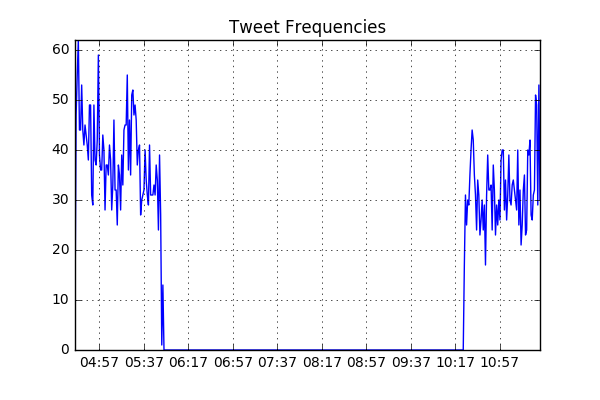

In [6]:
from datetime import datetime 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import time
import numpy as np
import pandas as pd
import pickle
from IPython.display import Image

timearray = tweets.get('created_at').tolist()
idx = pd.DatetimeIndex(timearray)
ones = np.ones(len(timearray))
#series of ones with timestamp as index
ones_series = pd.Series(ones, index=idx)

#Bucketing into one miute buckets using resample
per_minute = ones_series.resample('1Min', how='sum').fillna(0)

# Plotting the series 
fig, ax = plt.subplots() 
ax.grid(True) 
ax.set_title("Tweet Frequencies")

hours = mdates.MinuteLocator(interval=30) 
date_formatter = mdates.DateFormatter('%H:%M') 
 
datemin = datetime(2017, 6, 8, 4, 35) 
datemax = datetime(2017, 6, 8, 11, 33)

ax.xaxis.set_major_locator(hours) 
ax.xaxis.set_major_formatter(date_formatter) 
ax.set_xlim(datemin, datemax) 
max_freq = per_minute.max() 
ax.set_ylim(0, max_freq) 
ax.plot(per_minute.index, per_minute) 
plt.savefig('C:/Users/Dembla/Desktop/Jobs/twitter project/tweet_time_series.png')

Image(filename = 'tweet_time_series.png')

As we can note from the chart above, there are no tweets collected between 6 pm to 10.30 pm approximately. This is due to network connection failures I faced while I was streaming the tweets. Considering the context of our data and the short span of time we collected it for, trend analysis didn't turn out to produce very insightful results. However, it's very useful for many data science applications including web analytics.

### Most common users

What are the users that people mentioned the most in our data set. Let's see the top 20 most common users mentioned.

In [7]:
import sys 
from collections import Counter 
import json

def get_users(tweet): 
  entities = tweet.get('entities', {}) 
  users = entities.get('user_mentions', []) 
  return [tag['name'].lower() for tag in users] 
 
with open('C:/Users/Dembla/Desktop/Jobs/twitter project/WonderWoman.json', 'r') as f: 
    user_mentions = Counter() 
    for line in f:
        try:
            tweet = json.loads(line, encoding = 'utf-8')
        except:
            pass
        users_in_tweet = get_users(tweet) 
        user_mentions.update(users_in_tweet) 
    for tag, count in user_mentions.most_common(20): 
        print("{}: {}".format(tag, count)) 

gal gadot: 794
#wonderwoman: 582
kisses delavin: 330
m @ ax: 314
patty jenkins: 286
adam hughes: 274
anthony oliveira: 160
funko: 148
welovesf: 100
vanity fair: 98
hungrymaru: 98
hsn: 96
pia guerra: 72
warner bros. uk: 70
wazashirt: 70
entertainment earth: 66
richard angwin: 64
hollywood reporter: 62
gنcøhen🇫🇷🗽🇮🇱: 60
gal gadot thailand: 60


Since, our data is regarding the film Wonder Woman, it's no surprise that Gal Gadot the most common user mentioned and wonderwoman film official account is on 2nd place. Petty Jenkins on number 6 is the director of the movie. 

Let's visualize top 30 most mentioned users on a histogram.

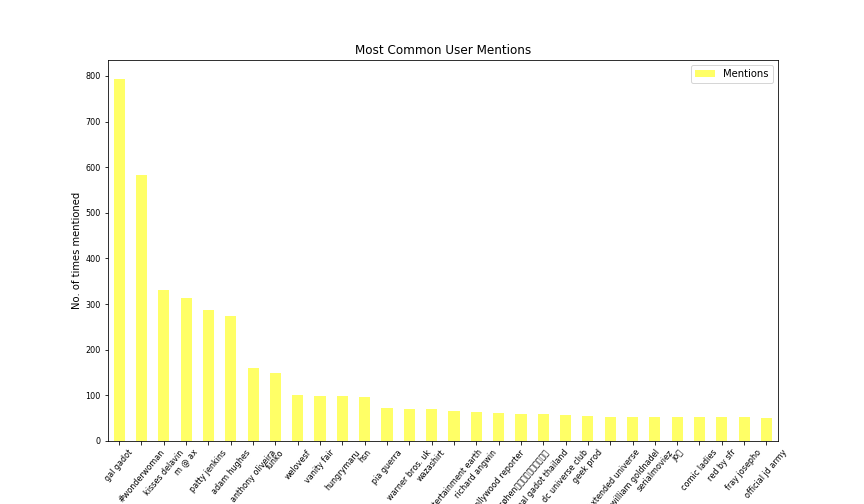

In [8]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

users = user_mentions.most_common(30)
x = list(range(1,31))

#data frame with screen names' and  number of times mentioned as columns
Common_Users = pd.DataFrame(users, index = x , columns = ['Screen Names', 'Mentions'])

#Plotting the histogram
Common_Users.plot(x= 'Screen Names', y = 'Mentions', kind ='bar', figsize = (12,7), fontsize=8, colormap='summer_r', position =0.5, rot = 50)
plt.title("Most Common User Mentions")
plt.ylabel("No. of times mentioned")
plt.xlabel("Screen Names")
plt.savefig('hist.png')
Image(filename = 'hist.png')

## Step 3: Cleaning up Tweets

Before we can move on to sentiment analysis of our tweets text. We need to clean up our tweets to remove noisy data so that our sclassifiers work without any glitches. Data cleaning is the most important step in a data analysis pipeline. Models produce inaccurate results if we do not clean up data and since here we are dealing with text data posted by users around the World, we can be sure that there is a lot of noise in our data. 

Let's begin with our cleaning process. First step is to filter english tweets from others as I, for now, wish to perform sentiment analysis only on tweets written in english language.

In [9]:
import pandas as pd
tweets_text = pd.DataFrame(data = tweets.get('text').loc[tweets['lang'] == 'en'], index=None, columns=None, dtype=None, copy=True).reset_index(drop = True)
print (len(tweets_text))

3540


The code above filters tweets by language and saves tweets in english in data frame 'tweets_text'. We have 3540 english tweets. Let's look at first 5 rows of our data frame.

In [10]:
tweets_text.head()

,text
0,RT @VanityFair: Catch up on 76 years of #Wonde...
1,Gotham City Garage #WonderWoman #Collectible. ...
2,RT @lsirikul: This is the crap that @ValerieCo...
3,The offer still stands to have you come on my ...
4,RT @arris_quinones: I’m officially a father. M...


Now we have only english Tweets in our data frame, we can begin our cleaning up process.

The steps in cleaning up tweets are as follows:

1. Convert to lower case. 'WOnDeRwOman', for example, becomes 'wonderwoman'
2. We convert all links in the tweet text to URL and @usernames to AT_USER as these user mentions and links are of no use when performing sentiment analysis.
3. Change #hashtags to hashtags. Hashtags are of not much use for sentiment analysis, however, some hashtags do contain sentiments and we should not discard them all together. We instead convert them to words and strip '#'. For example 'wonder woman was #awesome' now becomes 'wonder woman was awesome'
4. We strip punctuations, additional white spaces etc.

Let's write a function to perform this cleaning tweet by tweet for us.

In [11]:
#cleaning up tweets
import re

def CleanTweet(tweet):

    #Convert to lower case
    tweet = tweet.lower()
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet

text = tweets_text['text'].values.tolist()
len(text)
clean_tweets = []
for i in text:
    clean_tweets.append(CleanTweet(i))

len(clean_tweets)

3540

Let's pass a tweet from our original dataset through our function and see how it performs.

In [12]:
#original tweet
print (tweets_text['text'].iloc[2])

#cleaned up tweet
print (CleanTweet(tweets_text['text'].iloc[2]))

RT @lsirikul: This is the crap that @ValerieComplex is going through. PEOPLE NEED TO LISTEN TO WOMEN OF COLOR TALKING! Do not tal… 
rt AT_USER this is the crap that AT_USER is going through. people need to listen to women of color talking! do not tal… 


## Step 4: Process tweets for feature extraction

To perform sentiment analysis we need to extract features from our text. Features are nothing but individual words from tweets that are catagorized as 'positive', 'negative' and 'neutral' based on the sentiment. Once we extract the all the features, we select useful features that help us build effective models. Feature selection depends on the the data we are working with. We will get in details when we get to feature selection.

Below are the steps that we follow to process our tweets for feature extraction:

1. Tokenization: We strip each tweets into words
2. Normalization: Converting text to canonical form. For example, "we're" is converted to "we are".
3. Stop Words removal: Some words in english do not have a useful meaning or sentiment. "The", "in" "a" are examples  of stop word. It's better to remove these words because they would be useless as features.

Let's write functions to process tweets for feature extraction.

In [13]:
#tokenization and normalization
import string
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords 
#tokenization
def process(tweet, tokenizer=TweetTokenizer(), stopwords=[]): 
  tokens = tokenizer.tokenize(tweet) 
  return [tok for tok in tokens if tok not in stopwords and not  
          tok.isdigit()]

tweet_tokenizer = TweetTokenizer() 
punct = list(string.punctuation) 
stopword_list = stopwords.words('english') + punct + ['rt', 'via', '...', 'AT_USER', 'URL', "'"]
#normalization         
def normalize_contractions(tokens, stopwords =[]): 
  token_map = { 
    "i'm": "i am", 
    "you're": "you are", 
    "it's": "it is", 
    "we're": "we are", 
    "we'll": "we will",
    "ain't": "are not",
    "ive" : "i have",
    "aint": "are not"
      } 
  for tok in tokens: 
    if tok in token_map.keys(): 
      for item in token_map[tok].split():
        if item not in stopwords:
         yield item
    else: 
      yield tok
    



Now that we have tokenization and normalization functions in place, let's do a test run. 

We pass a cleaned up tweet through process function to tokenize and remove stop words and then we pass the tokens through our normalize function. 

In [14]:
TestClean = CleanTweet(u"ain't we going to the GreAt wall of CHINA??!!")
TestProcess = process(TestClean, stopwords = stopword_list)
TestNormalize = normalize_contractions(TestProcess)

print (TestProcess)
print (list(TestNormalize))

["ain't", 'going', 'great', 'wall', 'china']
['are', 'not', 'going', 'great', 'wall', 'china']


Please note tha we can choose to not remove of stopwords while either tokenizing or normalizing using our process and normalize_contractions functions. In the test example above, I chose to ignore stopword argument through normalize_contraction to check if it works fine. As we can see, both our functions provided the expected output.

## Step 5:  Feature Extraction

Once we are done with cleaning up and pre processing, next step is to extract features from our data. We write a feature extraction function to perform this task. 

Please note that there is a replaceTwoOrMore function that replaces 2 or more repetetive characters with 2 characters. For example, 'finallllly' becomes 'finally'. This function is necessary to deal with informal nature of social media lingo.

In [15]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

def getFeatureVector(tweet):
        featureVector = []
        stopword_list = stopwords.words('english') + punct + ['rt', 'via', '...', 'AT_USER', 'URL', 'https', 'https',"'"]
        words = list(normalize_contractions(process(tweet, tokenizer=tweet_tokenizer, stopwords= stopword_list), stopwords= stopword_list))
        for w in words:
        #replace two or more with two occurrences
            w = replaceTwoOrMore(w)  
            #check if the word starts with an alphabet
            val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
            if val is None:
                continue
            else:    
                featureVector.append(w.lower())
        return featureVector

Now that we have cleaning, pre processing and feature extraction functions in place, we can extract features from a twitter data set. 

**The data we collected is not labeled with a true class catagory and we need an already labeled data set to train our classifiers**. I downloaded a data set consists that of imdb reviews of movies and sentiment associated with the reviews: 0 being negative sentiment and 1 being positive.

We'll use this labeled data set to train the classifiers and test the accuracy of predictions. We can thereafter use the trained classifier to perform sentiment classification on the data we collected. 

Below is the snippet to clean, pre process and extract features from the data set.

In [16]:
import csv
import nltk
inpTweets = csv.reader(open('C:/Users/Dembla/Desktop/Jobs/twitter project/imdb_labelled.txt', 'r'), delimiter='\t', quotechar='|')
labeled_tweets = []
for row in inpTweets:
    sentiment = row[1]
    tweet = row[0]
    TrainedClean = CleanTweet(tweet)
    featureVector = getFeatureVector(TrainedClean)
    labeled_tweets.append((featureVector, sentiment))

labeled_tweet is list that consists of meaningful words(features) from each tweet and the label associated with it. 

As we print labeled_tweets below, we can see that it's a list of meaningful clean tweets along with sentiment label, where each tweet has been cleaned, normaized and preprocessed

In [17]:
print (labeled_tweets)

[(['aimless', 'movie', 'distressed', 'drifting', 'young', 'man'], '0'), (['sure', 'lost', 'flat', 'characters', 'audience', 'nearly', 'half', 'walked'], '0'), (['attempting', 'artiness', 'black', 'white', 'clever', 'camera', 'angles', 'movie', 'disappointed', 'became', 'even', 'ridiculous', 'acting', 'poor', 'plot', 'lines', 'almost'], '0'), (['little', 'music', 'anything', 'speak'], '0'), (['best', 'scene', 'movie', 'gerardo', 'trying', 'find', 'song', 'keeps', 'running', 'head'], '1'), (['rest', 'movie', 'lacks', 'art', 'charm', 'meaning', 'emptiness', 'works', 'guess', 'empty'], '0'), (['wasted', 'two', 'hours'], '0'), (['saw', 'movie', 'today', 'thought', 'good', 'effort', 'good', 'messages', 'kids'], '1'), (['bit', 'predictable'], '0'), (['loved', 'casting', 'jimmy', 'buffet', 'science', 'teacher'], '1'), (['baby', 'owls', 'adorable'], '1'), (['movie', 'showed', 'lot', 'florida', 'best', 'made', 'look', 'appealing'], '1'), (['songs', 'best', 'muppets', 'hilarious'], '1'), (['cool'

Now let's create a list of only word features without label and print the list.

In [18]:
def words_in_tweets(labeled_tweets):
    all_words = []
    for (words, sentiment) in labeled_tweets:
        all_words.extend(words)
    return all_words

word_features = words_in_tweets(labeled_tweets)
print (word_features)

['aimless', 'movie', 'distressed', 'drifting', 'young', 'man', 'sure', 'lost', 'flat', 'characters', 'audience', 'nearly', 'half', 'walked', 'attempting', 'artiness', 'black', 'white', 'clever', 'camera', 'angles', 'movie', 'disappointed', 'became', 'even', 'ridiculous', 'acting', 'poor', 'plot', 'lines', 'almost', 'little', 'music', 'anything', 'speak', 'best', 'scene', 'movie', 'gerardo', 'trying', 'find', 'song', 'keeps', 'running', 'head', 'rest', 'movie', 'lacks', 'art', 'charm', 'meaning', 'emptiness', 'works', 'guess', 'empty', 'wasted', 'two', 'hours', 'saw', 'movie', 'today', 'thought', 'good', 'effort', 'good', 'messages', 'kids', 'bit', 'predictable', 'loved', 'casting', 'jimmy', 'buffet', 'science', 'teacher', 'baby', 'owls', 'adorable', 'movie', 'showed', 'lot', 'florida', 'best', 'made', 'look', 'appealing', 'songs', 'best', 'muppets', 'hilarious', 'cool', 'right', 'case', 'movie', 'delivers', 'everything', 'almost', 'right', 'face', 'average', 'acting', 'main', 'person',

Before we move on to building our classifiers, we need one last modification in our labeled data structure. Vectorizers in SciKit learn accept raw text to convert features(useful words) to vectors and we have a list of strings which the vectorizer won't accept. Hence, we write JoinWords function below to join a list of strings into a sentence i.e. raw text. We apply that function to our data frame and see what it looks like.

In [19]:
def JoinWords(words):
    return( ' '.join(item for item in words))

import pandas as pd
labeled_data= pd.DataFrame((labeled_tweets), columns = ('Vectors', 'label'), copy = True)

labeled_data['Vectors']=labeled_data['Vectors'].apply(func = JoinWords)
labeled_data.head()

,Vectors,label
0,aimless movie distressed drifting young man,0
1,sure lost flat characters audience nearly half...,0
2,attempting artiness black white clever camera ...,0
3,little music anything speak,0
4,best scene movie gerardo trying find song keep...,1


As we can see training_data dataframe, the text in each row is clean and processed i.e. normalized, without punctutions and stop words. This is the clean data that we'll use to pass through our classifier. Please note that all the words that were orginally in our raw imdb dataset are in our new training_data **except** the stop words. However, should we use all these words to train our classifier? We sure could, but in machine learning, adding more number of features after a certain point doesn't only makes our model heavy on computation and memory which increases space time complexity but also could negatively effect the accuracy because of useless features acting as noise. 

Hence, we select useful features that give the highest possible accuracy without compromising on efficiency in terms of time and memory. We are going to use a few methods of feature selection and see how our classifier performs. Let's start with the bag of words model which is nothing but the countvectorizer method which selects features(words) based on their term frequency i.e. how many times a word appears in a document (which in our case is a tweet/movie review)

Now let's examine our training_data.

In [20]:
labeled_data.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Our labeled data is equally divided between negative and positive classes. Now let's divide our data between X variables i.e. the features/predictors and y variable which is the prediction/label/class.

In [21]:
X = labeled_data['Vectors']
y = labeled_data['label']
print (X.shape)
print (y.shape)

(1000,)
(1000,)


Now it's time to randomly split our labeled data into training and test set, separately for predictors(X) and class(y)

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
   
    
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750,)
(250,)
(750,)
(250,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
print (X_test)

507                    time film ended disliked despised
818                         acting expect cast top notch
452       plot hang together acting absolutely appalling
368    felt though going ireland absolutely nothing w...
242    good intentions made film great film might one...
929    movie completely perfect titta di girolamo sta...
262    cinematography simply stunning say least fx no...
810                  course footage grainy enhanced film
318             characters film tremendously well played
49     film succeeds despite perhaps obviously meagre...
446    like armand assante cable summary sounded inte...
142    hour half waste time following bunch pretty hi...
968    hayao latest eighth film studio ghibili gake u...
345                                       babie bop cute
971    art style appearance crayon pencil drawings wo...
133                                 great disappointment
104                                  politically correct
6                              

## Bag of words feature selection

Finally we have separate training and test data sets for predictors and classes, we can now convert our features into vectors using count vectorizer which is nothing but bag of words model. The snippet below performs the following:

1. Convert words in training predictor data to vectors using CountVectorizer based on their term frequency and keep only the most useful features.
2. Use those vectors to create a sparse matrix using fit_transform funtion which will train our classifiers.
3. We examine the size of features selected by CountVectorizer and compare it with total number of features i.e. all the useful words we had in labeled tweets


In [24]:
#vectorization
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', preprocessor = None, tokenizer = None, stop_words = stopword_list, lowercase = False)

X_train_dtm = vectorizer.fit_transform(X_train)
vocab = vectorizer.get_feature_names()
print (len(vocab))
print (len(word_features))
X_train_dtm

2296
7124


<750x2296 sparse matrix of type '<class 'numpy.int64'>'
	with 5187 stored elements in Compressed Sparse Row format>

As we can see above, the size of feature vocabulary selected by vectorizer is 2296 and total number of feaures i.e. meaningful words we had in our labeled data are 7124. This is significant feature space reduction. Also, we now have a sparse matrix from our selected features. 

We also need to creata a sparse matrix from test predictors to be able to predict their class.

In [25]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<250x2296 sparse matrix of type '<class 'numpy.int64'>'
	with 1244 stored elements in Compressed Sparse Row format>

# Step 6: Build and train classifiers

We are now ready to train classifiers. We will be using SciKit learn machine learning module to call classifiers that we wish to use. We will train the classifiers by passing training set predictor sparse matrix (X_train_dtm) and training set response matrix (y_train) through them. Remember, the predictor sparse matrix contains features selected by CountVectorizer (Bag of words) which means that we are using only those features to train the classifiers.

To predict, we use predictor test data sparse matrix (X_test_dtm). Although we already have true class labels for test data set, we will still not use this data set to train the classifiers as we need the true class labels later to compare with the predicted class label to calculate the accuracy of the classifiers. 

If we train our classifiers with all the labeled data, we will not be able to test the accuracy of our classifier as the classifier will already be trained on all the labeled data set. This is the reason why we need to split labeled data into training and test set. Of course, once we have our final classifier ready for a real world application, we can use all our labeled data to train the classifier as the more trained it is, the better it will perform.

Note: Notice that we only transorm our test data predictors and not fit because we choose to fit the classifier using the parameters from training data set. We transform test data set using the same parameters. If we were to fit the test data, the fit parameters would also depend on the test data.

So let's get the ball rolling!



## Naive Bayes Classifier:

The first classifier we are going to use is the Naive Bayes classifier. Naive Bayes, although a simple aproach, is usually the best choice for text classification purpose. Naive Bayes is a simple probilistic classifier based on Bayes theorem that assumes independence betwen features. Below are the steps to perform classification with SciKit learn library.

1. Initiate the classifier.
2. Train the classifier with predictor sparse matrix.
3. Perform prediction on test data i.e by passing test data sparse matrix through predict method.
4. Save the predictions to calculate accuracy.

In [26]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)


Wall time: 8 ms


Now that we have class predictions saved in y_pred_class, we can calculate the accuracy of the classifier by comparig y_pred_class and y_test(ground truth).

In [27]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.81200000000000006

Great! Naive Bayes predicted the class of test data with 81.2% accuracy. We can fine tune this classifier by tuning a few parameters and trying different feature selection methods, but we'll get it later. For now, let's try other classifiers with the same set of features and see how they perform. 

Now let's look look at the confusion matrix to see how many type 1 and type 2 errors the Naive Bayes classifier produced.

In [28]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[102,  24],
       [ 23, 101]])

24 false positve and and 23 false negative errors. Let's look at  the list of false positive errors.

In [29]:
#print false positive
X_test[y_pred_class > y_test]

452       plot hang together acting absolutely appalling
133                                 great disappointment
104                                  politically correct
598    every element story top excessively phony cont...
589                beware trashy cult movie trash period
374                             see probably leave shelf
910            highly doubt anyone could ever like trash
41                                  least bit interested
685    many continuity errors one user commented diff...
457      someone involved knew string together narrative
335    superficial movie gave feeling watching play r...
911                                                     
479                                   course acting blah
180                                             lead man
311    one thing tolerate political incorrectness wel...
776                                            film made
111                  directing cinematography quite good
205                  really see

In [30]:
#example false positive
X_test[452]

'plot hang together acting absolutely appalling'

## Logistic Regression

Now let's the same classification using Logistic Regression or Maximum Entropy classifier. This classifier is also a probabilistic classifier lime Naive Bayes but unlike the Naive Bayes classifier, the Max Entropy does not assume that the features are conditionally independent of each other. The MaxEnt is based on the Principle of Maximum Entropy and from all the models that fit the training data, selects the one which has the largest entropy. 

Now let's perform classification using Max Entropy classifier.

In [31]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)
#make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

Wall time: 12 ms


0.79200000000000004

The classifier performed fairly well with an accuracy of 79.2%. Let's examine the confusion matrix to see where it made more errors than Naive Bayes classifier.

In [32]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[104,  22],
       [ 30,  94]])

Upon comparing, we can see here that maximum entropy classifier made more false positive errors than than Naive Bayes classifier.

## SVM (Support Vector Machines) 

A Support Vector Machine (SVM) is a non probabilisic classifier which separates examples of one catagory from another catagory by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. Let's call this classifier from SciKit learn module and see how it performs on the same training and test data.

In [33]:
#Initialize the classifier
from sklearn import svm
supportvec = svm.LinearSVC()
# train the model using X_train_dtm
%time supportvec.fit(X_train_dtm, y_train)
#make class predictions for X_test_dtm
y_pred_class = supportvec.predict(X_test_dtm)
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

Wall time: 11.1 ms


0.75600000000000001

Compared with above 2 classifiers, SVM performed with least accuracy. Let's examine the confusion matrix


In [34]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[98, 28],
       [33, 91]])

Most number of false negative as well as false positive errors compared with the above 2 classifiers.

# Feature extraction using TFIDF Vectorizer

We have already trained classifiers using feature selection by Countvectorizer i.e. bag of words model. Let's see if our classification models perform better using TFIDF vectorizater.

Whereas count vectorizer counts word frequencies, in the case of TFIDF Vectorizer, the value increases proportionally to count of the word frequency, but is offset by the frequency of the word in the corpus. 

The frequency offset is taken care by the inverse document frequency (IDF) part. For example, without IDF, a word like 'the'(assuming we do not remove stop words), which is one of the most commonly used words in english yet meaningless in context of text classification would bear a higher weight than less frequent yet meaningful words.

Let's use TfidfVectorizer to convert the training data set into vector matrix to train the classifiers and check if this improves their accuracy.

In [35]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', preprocessor = None, tokenizer = None, stop_words = stopword_list,  binary = True, lowercase = False)

X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

Wall time: 4 ms


0.81999999999999995

In [36]:
#import and instantiate a logistic regression model
vectorizer = TfidfVectorizer(analyzer = 'word', preprocessor = None, tokenizer = None, stop_words = stopword_list,  binary = True, lowercase = False)

X_train_dtm = vectorizer.fit_transform(X_train)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)
#make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

Wall time: 8 ms


0.79200000000000004

In [37]:
#Initialize the classifier
from sklearn import svm
supportvec = svm.LinearSVC()
# train the model using X_train_dtm
%time supportvec.fit(X_train_dtm, y_train)
#make class predictions for X_test_dtm
y_pred_class = supportvec.predict(X_test_dtm)
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

Wall time: 8 ms


0.78000000000000003

# Comparing the models 

Let's compare and visualize accuracy scores of the classifiers above using plotly bar graph.

In [39]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF


# Add graph data
classifiers = ['Naive Bayes', 'Max Entropy', 'SVM']
         
Accuracy_BOW = [81.2, 79.2, 75.6]
Accuracy_TFIDF = [81.99, 79.3, 78]
# Make traces for graph
trace1 = go.Bar(x=classifiers, y=Accuracy_BOW,
                marker=dict(color='#0099ff'),
                name='Count(BOW) Vectorizer')
trace2 = go.Bar(x=classifiers, y=Accuracy_TFIDF,
                marker=dict(color='#404040'),
                name='TFIDF Vectorizer')

# Add trace data to figure
Data= [trace1, trace2]
layout = go.Layout(barmode='group')

fig = go.Figure(data=Data, layout=layout)
py.iplot(fig)


It is clear from comparison that the classifier that performs the best with respect to training and test data set in our case is **Naive Bayes with TFIDF Vectorizer** with maximum accuracy 81.99%. It's no surprise as TFIDF Vectorizer and Naive Bayes classifier are the most popular choices for such a text classification purpose.

# Classification of collected tweets

Now that we have trained our classifier and determined the best available model, it's time to fire up the classifier and classify the 3540 tweets we collected. Here we go:

## Step 1: Prepare tweets for classifier:

In [ ]:
#Process, clean and extract features to prepare for classifier 
processed_tweets = [] 
for item in clean_tweets:
    featureVector = getFeatureVector(item)
    joined_strings = JoinWords(featureVector)
    processed_tweets.append(joined_strings)

collected_tweets = pd.DataFrame(processed_tweets)
collected_tweets.head()
final_collected_tweets = collected_tweets[0]
    

## Step 2: Train Naive Bayes classifier to classify our collected tweets

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', preprocessor = None, tokenizer = None, stop_words = stopword_list,  binary = True, lowercase = False)

X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(test_collected_tweets)

# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

## Classification Results:

Our Classifier has now classified all the tweets. Now let's prompt user to enter the index of the tweet and print the sentiment as well as the tweet.

In [ ]:
string = input('Please mention a tweet index number ')
x = int(string)
print ('Tweet:', clean_tweets[x])
print ('Sentiment:', y_pred_class[x])

# Future Work:

- Parameter tuning to maximize accuracy of classifiers.
- Using n-gram features such as bigrams and/or trigrams with POS (part of speech) tagging, unigrams with negation for classifier to understand complex sentence structures.
- Training classifiers with more relevant/better labeled data. Simple classifiers can perform exceptionally well when trained with relevant features, for e.g. adding emoticons to feature space.
- Extending this project to create a web app to retrieve tweets twitter and perform sentiment classification in real time.

# References:

I have learned fundamentals of NLTK, text analysis and classification by reading books and going through articles and tutorials on websites like github.com and stackoverflow.com. Below are the mentions of the books that I read and some great tutorials that helped me get the grasp on concepts of NLTK and machine learning with python.

- "Natural Language Processing with Python" (book) by Steven Bird, Ewan Klein, and Edward Loper.

- "Mastering Social Media Mining with Python" (book) by Marco Bonzanini. 

- "how to build a twitter sentiment analyzer" by Ravikiran Janardhana (May 08, 2012). Retrieved from www.ravikiranj.net

- "Natural Language Procesing" by Harrison(Harrison@pythonprogramming.net). Retrieved from www.pythonprogramming.net

- "Twitter sentiment analysis using Python and NLTK" by Laurent Luce (January 2, 2012). Retrieved from http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/

- "Tutorial: Machine Learning with Text in scikit-learn" by Kevin Markham (October 7, 2016). Retrieved from https://github.com/justmarkham/pydata-dc-2016-tutorial


